In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# STEP 1: Data reading
df = pd.read_csv("other files/images_analyzed_productivity1.csv")
print(df.head())
'''
plt.figure()
plt.scatter(df.Age, df.Productivity, marker='+', color='red')
plt.figure()
plt.scatter(df.Coffee, df.Productivity, marker='+', color='red')
'''

   User  Time  Coffee  Age  Images_Analyzed Productivity
0     1     8       0   23               20         Good
1     1    13       0   23               14          Bad
2     1    17       0   23               18         Good
3     1    22       0   23               15          Bad
4     1     8       2   23               22         Good


"\nplt.figure()\nplt.scatter(df.Age, df.Productivity, marker='+', color='red')\nplt.figure()\nplt.scatter(df.Coffee, df.Productivity, marker='+', color='red')\n"

([<matplotlib.patches.Wedge at 0x1e79a9d5be0>,
 [Text(-0.08630492316306847, 1.096609073570804, ''),
  Text(0.08630482049111692, -1.0966090816512493, '')],
 [Text(-0.04707541263440097, 0.598150403765893, '52.5%'),
  Text(0.04707535663151831, -0.5981504081734086, '47.5%')])

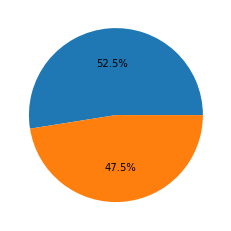

In [2]:
sizes = df['Productivity'].value_counts(sort=1)
plt.figure()
plt.pie(sizes, autopct='%2.1f%%')

In [3]:
# STEP 2: Drop irrelevant data
df.drop(['Images_Analyzed'], axis=1, inplace=True)
df.drop(['User'], axis=1, inplace=True)
print(df.head())


   Time  Coffee  Age Productivity
0     8       0   23         Good
1    13       0   23          Bad
2    17       0   23         Good
3    22       0   23          Bad
4     8       2   23         Good


In [4]:
# STEP 3: Dealing with missing values
# df = df.dropna()

# STEP 4: Convert non-numeric data to numeric
df.Productivity[df.Productivity == 'Good'] = 1
df.Productivity[df.Productivity == 'Bad'] = 2

print(df.head())


   Time  Coffee  Age Productivity
0     8       0   23            1
1    13       0   23            2
2    17       0   23            1
3    22       0   23            2
4     8       2   23            1


<ipython-input-4-c83c22956676>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Productivity[df.Productivity == 'Good'] = 1
<ipython-input-4-c83c22956676>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Productivity[df.Productivity == 'Bad'] = 2


In [5]:
# STEP 5: Prepare the data (define indep/dep variables)
Y = df['Productivity'].values
Y = Y.astype('int')

X = df.drop(['Productivity'], axis=1)
print(X.head())


   Time  Coffee  Age
0     8       0   23
1    13       0   23
2    17       0   23
3    22       0   23
4     8       2   23


In [6]:
# STEP 6: Split data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=20)

print(X_train.head())

    Time  Coffee  Age
42    18       4   31
5     13       2   23
54    17       2   45
12     8       6   23
78    17       6   52


In [14]:
# STEP 7: Define the model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)


LogisticRegression()

In [15]:
# STEP 8: Test the model
prediction_test = model.predict(X_test)

# STEP 9: Verify the model
from sklearn import metrics

print("Acc = ", metrics.accuracy_score(y_test, prediction_test))


Acc =  0.75


In [18]:
# STEP 10: Weights
print(model.coef_)

weights = pd.Series(model.coef_[0], index=X.columns.values)
print(weights)

[[0.18788991 0.19204588 0.0200644 ]]
Time      0.187890
Coffee    0.192046
Age       0.020064
dtype: float64
